# Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import spearmanr
from scipy.stats import kendalltau

# Загрузка данных

In [24]:
data = pd.read_csv('../data/data.csv', index_col=0)

In [25]:
data

,date,open_price,high_price,low_price,close_price,volume,price_change,price_change_percent,real_score
ticker,,,,,,,,,
SBER,2015-11-02,90.25,93.80,89.66,93.65,124983010,NaN,NaN,0.000000
SBER,2015-11-03,93.86,95.59,93.32,95.40,122392690,1.75,1.87,0.000000
SBER,2015-11-05,96.00,96.60,94.60,95.50,126679170,0.10,0.10,0.000000
SBER,2015-11-06,95.50,95.91,93.57,94.09,106562480,-1.41,-1.48,0.000000
SBER,2015-11-09,94.49,94.79,92.70,92.95,78965580,-1.14,-1.21,0.000000
...,...,...,...,...,...,...,...,...,...
SBER,2023-12-25,271.75,273.85,270.05,271.08,37827910,-0.22,-0.08,0.926206
SBER,2023-12-26,271.00,272.89,270.00,271.90,22575240,0.82,0.30,-0.947043
SBER,2023-12-27,271.90,272.59,270.85,271.08,17191450,-0.82,-0.30,0.932041


In [26]:
data['date'] = pd.to_datetime(data['date'], format="%Y-%m-%d")
data['close_price'] = data['close_price'].astype(float)
data['price_change'] = data['price_change'].astype(float)
data['price_change_percent'] = data['price_change_percent'].astype(float)
data['real_score'] = data['real_score'].astype(float)

data.dropna(inplace=True)
data

,date,open_price,high_price,low_price,close_price,volume,price_change,price_change_percent,real_score
ticker,,,,,,,,,
SBER,2015-11-03,93.86,95.59,93.32,95.40,122392690,1.75,1.87,0.000000
SBER,2015-11-05,96.00,96.60,94.60,95.50,126679170,0.10,0.10,0.000000
SBER,2015-11-06,95.50,95.91,93.57,94.09,106562480,-1.41,-1.48,0.000000
SBER,2015-11-09,94.49,94.79,92.70,92.95,78965580,-1.14,-1.21,0.000000
SBER,2015-11-10,92.76,94.42,92.02,94.35,71406950,1.40,1.51,0.000000
...,...,...,...,...,...,...,...,...,...
SBER,2023-12-25,271.75,273.85,270.05,271.08,37827910,-0.22,-0.08,0.926206
SBER,2023-12-26,271.00,272.89,270.00,271.90,22575240,0.82,0.30,-0.947043
SBER,2023-12-27,271.90,272.59,270.85,271.08,17191450,-0.82,-0.30,0.932041


Используем данные за полгода для котировок SBER (2023-06-01 - 2023-12-31)

In [27]:
start_date = '2023-06-01'
end_date = '2023-12-31'

df = data[(data['date'] >= start_date) & (data['date'] <= end_date)].copy()

In [28]:
df

,date,open_price,high_price,low_price,close_price,volume,price_change,price_change_percent,real_score
ticker,,,,,,,,,
SBER,2023-06-01,247.00,247.00,240.57,241.66,51897410,-4.51,-1.83,-0.142639
SBER,2023-06-02,242.01,245.50,240.77,243.95,46465000,2.29,0.95,-0.959974
SBER,2023-06-05,243.51,244.15,235.10,237.12,78650640,-6.83,-2.80,-0.822261
SBER,2023-06-06,236.00,242.10,232.54,240.91,100337100,3.79,1.60,0.472339
SBER,2023-06-07,241.23,244.39,238.56,241.25,63082450,0.34,0.14,0.932081
...,...,...,...,...,...,...,...,...,...
SBER,2023-12-25,271.75,273.85,270.05,271.08,37827910,-0.22,-0.08,0.926206
SBER,2023-12-26,271.00,272.89,270.00,271.90,22575240,0.82,0.30,-0.947043
SBER,2023-12-27,271.90,272.59,270.85,271.08,17191450,-0.82,-0.30,0.932041


# Удалим выбросы методом межквантильного размаха, чтобы подчистить данные

In [30]:
Q1 = df['price_change_percent'].quantile(0.25)
Q3 = df['price_change_percent'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price_change_percent'] >= lower_bound) & (df['price_change_percent'] <= upper_bound)]

print("Размер данных до удаления выбросов:", data.shape)
print("Размер данных после удаления выбросов:", df.shape)


Размер данных до удаления выбросов: (2044, 9)
Размер данных после удаления выбросов: (141, 9)


# Проверка на нормальность

In [31]:
def check_distribution(column, column_name ="column", dist="norm", bins = 30):
    column = column.dropna()

    statistic, p_value = stats.normaltest(column)
    print(f"p-value for the normal test: {p_value}")

    if p_value > 0.05:
        print(f"Массив {column_name} имеет нормальное распределение.")
    else:
        print(f"Массив {column_name} не имеет нормального распределения.")

    plt.subplots(figsize=(15, 6))

    stats.probplot(column, dist="norm", plot=plt)
    plt.title(f"Q-Q plot for {column_name}")
    plt.show()
    
    plt.subplots(figsize=(15, 6))
    plt.hist(column, bins=bins, color='skyblue', edgecolor='black')
    plt.title(f'Распределение {column_name}')
    plt.xlabel(f'{column_name}')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()
    

p-value for the normal test: 0.7846610250035857
Массив price_change имеет нормальное распределение.


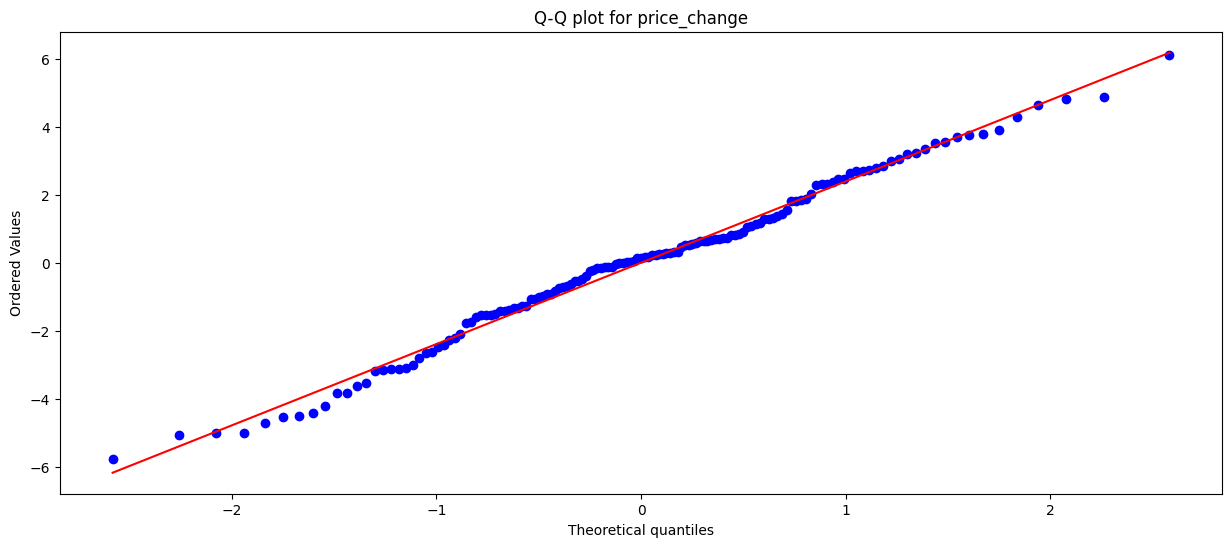

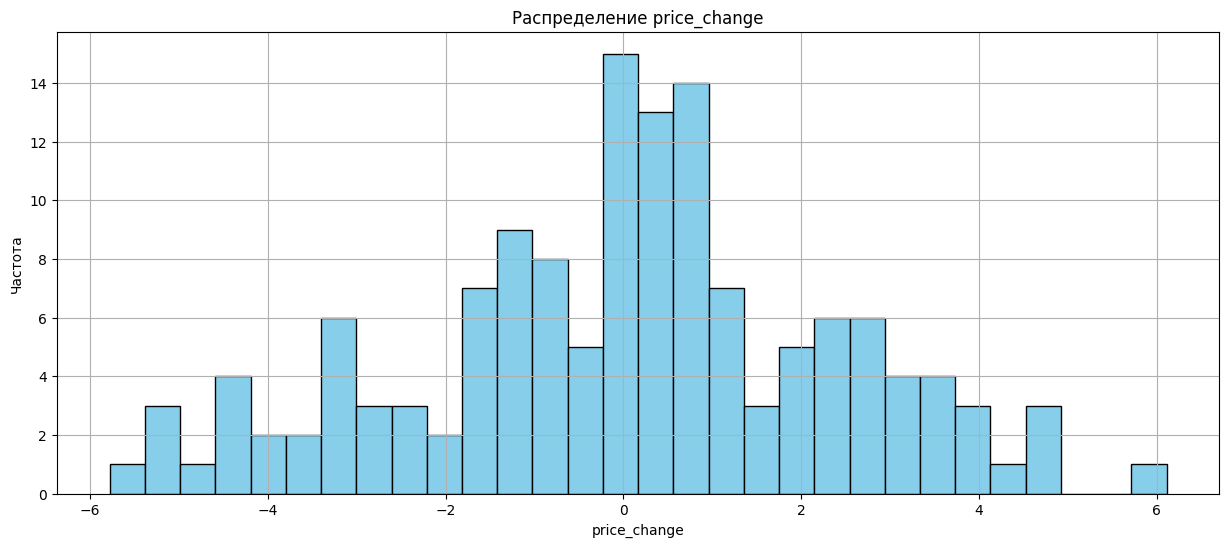

In [32]:
check_distribution(df['price_change'],column_name='price_change')

p-value for the normal test: 1.5911884299428855e-31
Массив real_score не имеет нормального распределения.


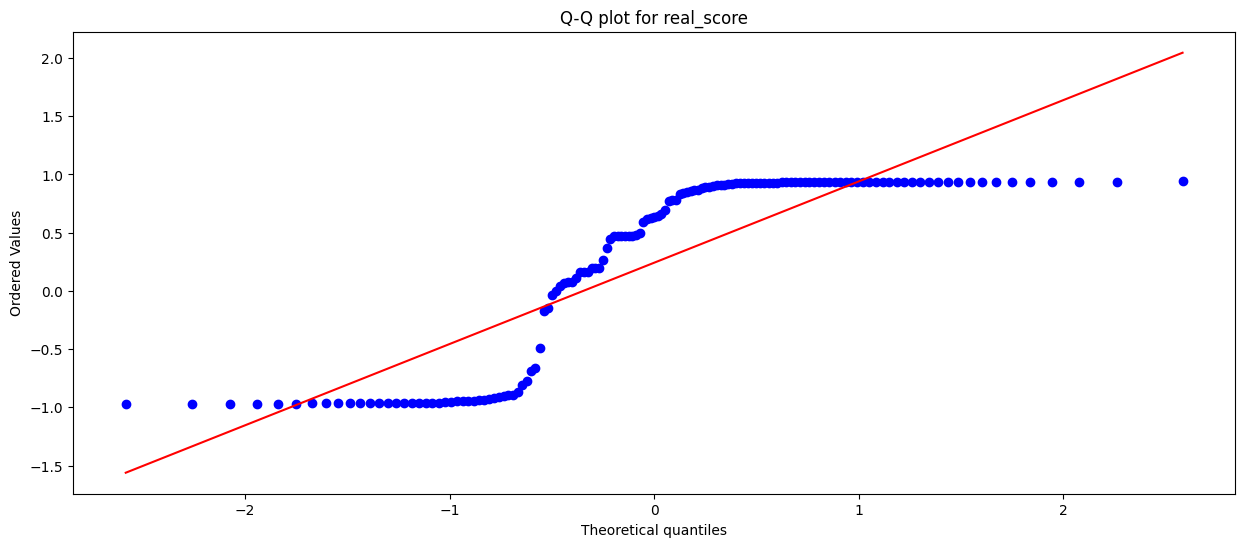

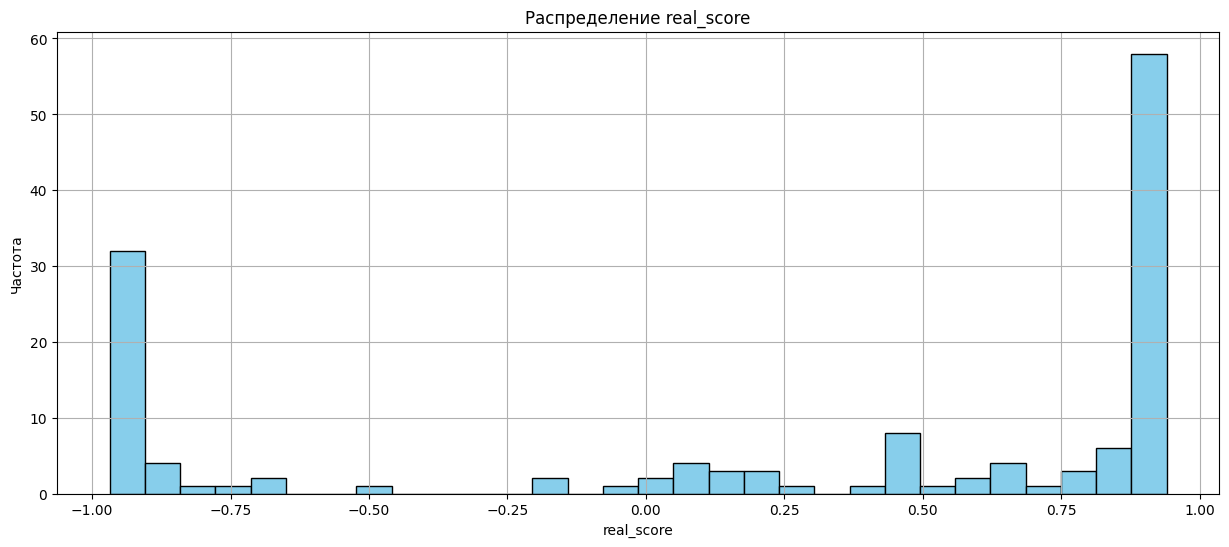

In [33]:
check_distribution(df['real_score'],column_name='real_score')

# Корреляционный анализ

In [34]:
def corr_analysis(col1,col2, col1_name = "Column 1", col2_name = "Column 2"):
    pirson_correlation = col1.corr(col2)
    print(f"Коэффициент корреляции Пирсона между {col1_name} и {col2_name}:", pirson_correlation)
    print()
    
    spearman_corr, p_value = spearmanr(col1,col2)
    print(f"Коэффициент Спирмена между {col1_name} и {col2_name}:", spearman_corr)
    print("p-value:", p_value)
    print()
    
    kendall_corr, p_value = kendalltau(col1,col2)
    print(f"Коэффициент между {col1_name} и {col2_name}:", kendall_corr)
    print("p-value:", p_value)

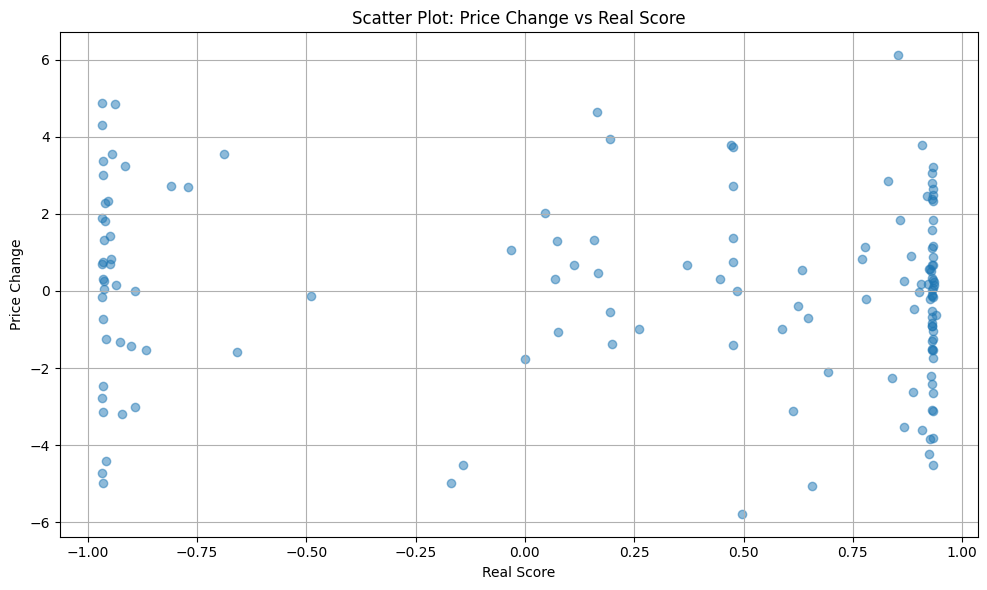

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(df['real_score'], df['price_change'], alpha=0.5)
plt.title('Scatter Plot: Price Change vs Real Score')
plt.xlabel('Real Score')
plt.ylabel('Price Change')
plt.grid(True)
plt.tight_layout()
plt.show()

## Проверим корреляцию приращений цены "сегодня" от новости "сегодня"

In [38]:
corr_analysis(df['price_change'], df['real_score'], col1_name='price_change', col2_name='real_score')

Коэффициент корреляции Пирсона между price_change и real_score: -0.08547239895310009

Коэффициент Спирмена между price_change и real_score: -0.10454436965507947
p-value: 0.21730391184318365

Коэффициент между price_change и real_score: -0.06990311187163378
p-value: 0.2193761494318024


## Проверим корреляцию приращений цены через n дней от новости "сегодня"

In [39]:
n = 1
corr_analysis(df['price_change'].iloc[n:], df['real_score'].iloc[:-n], col1_name='price_change', col2_name='real_score')

Коэффициент корреляции Пирсона между price_change и real_score: -0.08679955367734113

Коэффициент Спирмена между price_change и real_score: -0.054722326398940334
p-value: 0.5207694764380222

Коэффициент между price_change и real_score: -0.03550661363861077
p-value: 0.5342283148176854


In [40]:
n = 2
corr_analysis(df['price_change'].iloc[n:], df['real_score'].iloc[:-n], col1_name='price_change', col2_name='real_score')

Коэффициент корреляции Пирсона между price_change и real_score: -0.1518241825303821

Коэффициент Спирмена между price_change и real_score: -0.18267027586317194
p-value: 0.03137004932328294

Коэффициент между price_change и real_score: -0.1280083572714466
p-value: 0.025575052389744623


In [41]:
n = 3
corr_analysis(df['price_change'].iloc[n:], df['real_score'].iloc[:-n], col1_name='price_change', col2_name='real_score')

Коэффициент корреляции Пирсона между price_change и real_score: -0.04309415551032409

Коэффициент Спирмена между price_change и real_score: -0.04583538351441764
p-value: 0.5934613163688973

Коэффициент между price_change и real_score: -0.031993221101916144
p-value: 0.5782623523325454


# Введем новый атрибут duration_real_score_n,  который будем считать как скольящее среднее по предыдущим n дням (пердполагая, что новость в n дней имеет вес).

In [42]:
real_score = list(df['real_score'])

In [43]:
for n in range(0,7):
    duration_real_score = [real_score[i] for i in range(n)]
    for i in range(n, len(real_score)):
        temp_sum = 0
        for j in range(n):
            temp_sum += real_score[i-j-1]
        duration_real_score+=[(temp_sum+real_score[i])/(n+1)]

    df[f'duration_real_score_{n+1}'] = duration_real_score

In [44]:
df[['duration_real_score_1', 'duration_real_score_2', 'duration_real_score_3', 'duration_real_score_4', 'duration_real_score_5', 'duration_real_score_7']]

,duration_real_score_1,duration_real_score_2,duration_real_score_3,duration_real_score_4,duration_real_score_5,duration_real_score_7
ticker,,,,,,
SBER,-0.142639,-0.142639,-0.142639,-0.142639,-0.142639,-0.142639
SBER,-0.959974,-0.551306,-0.959974,-0.959974,-0.959974,-0.959974
SBER,0.472339,-0.243817,-0.210091,0.472339,0.472339,0.472339
SBER,0.932081,0.702210,0.148149,0.075452,0.932081,0.932081
SBER,0.929715,0.930898,0.778045,0.343540,0.246305,0.929715
...,...,...,...,...,...,...
SBER,0.926206,0.889721,0.292875,-0.021250,0.169654,0.386005
SBER,-0.947043,-0.010419,0.277466,-0.017105,-0.206409,0.117442
SBER,0.932041,-0.007501,0.303735,0.441110,0.172725,0.119038


In [45]:
df[['duration_real_score_1', 'duration_real_score_2', 'duration_real_score_3', 'duration_real_score_4', 'duration_real_score_5', 'duration_real_score_7']].describe()

,duration_real_score_1,duration_real_score_2,duration_real_score_3,duration_real_score_4,duration_real_score_5,duration_real_score_7
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.242194,0.238384,0.232035,0.233125,0.238400,0.240048
std,0.792424,0.577380,0.478848,0.405289,0.371848,0.330317
min,-0.968167,-0.967301,-0.964983,-0.959974,-0.959974,-0.959974
25%,-0.865993,-0.068144,-0.099551,-0.038474,0.017946,0.070683
50%,0.633559,0.179947,0.291465,0.335014,0.246305,0.262380
75%,0.931166,0.813238,0.629807,0.459948,0.490678,0.468992
max,0.940421,0.935218,0.934117,0.933211,0.932973,0.932081


-------------------------------------------------------------------------------
-------------- Распределение и корреляция duration_real_score_1 ---------------
p-value for the normal test: 1.5911884299428855e-31
Массив duration_real_score_1 не имеет нормального распределения.


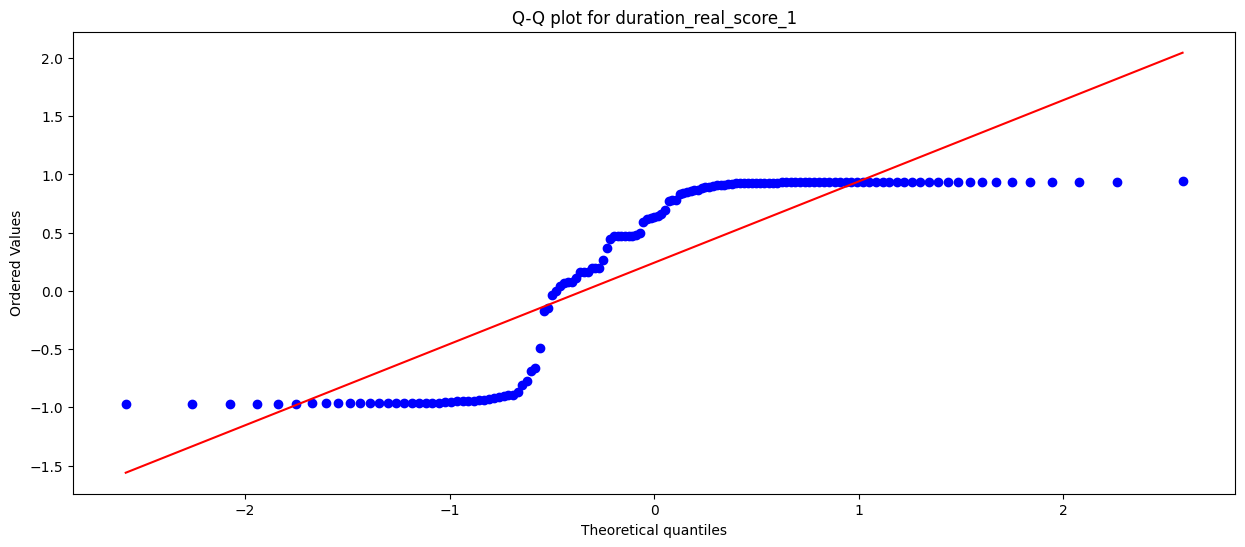

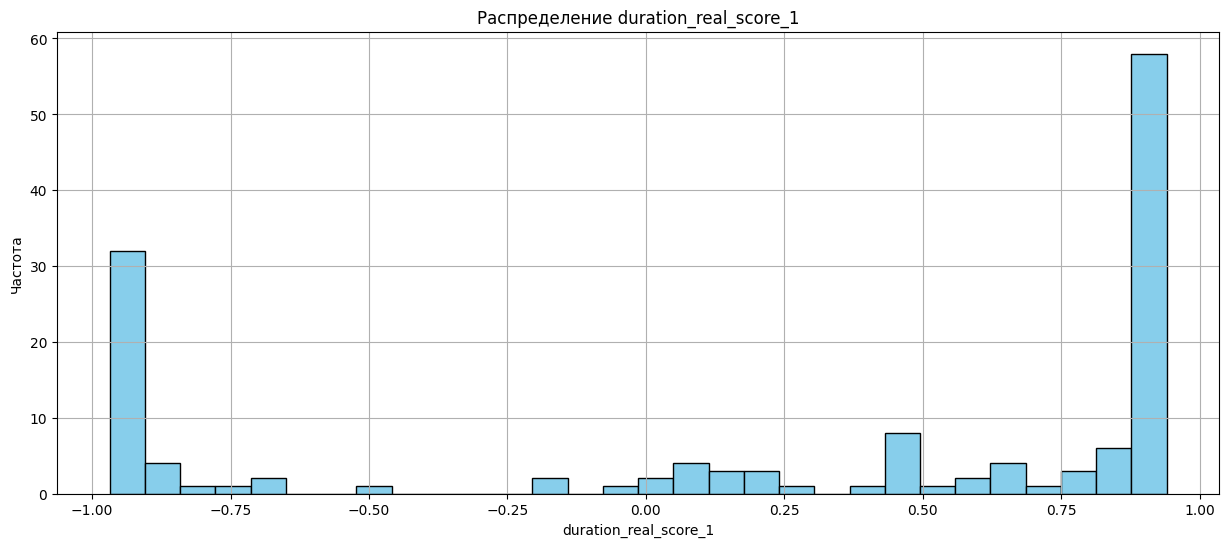

Коэффициент корреляции Пирсона между price_change и duration_real_score_1: -0.08547239895310009

Коэффициент Спирмена между price_change и duration_real_score_1: -0.10454436965507947
p-value: 0.21730391184318365

Коэффициент между price_change и duration_real_score_1: -0.06990311187163378
p-value: 0.2193761494318024


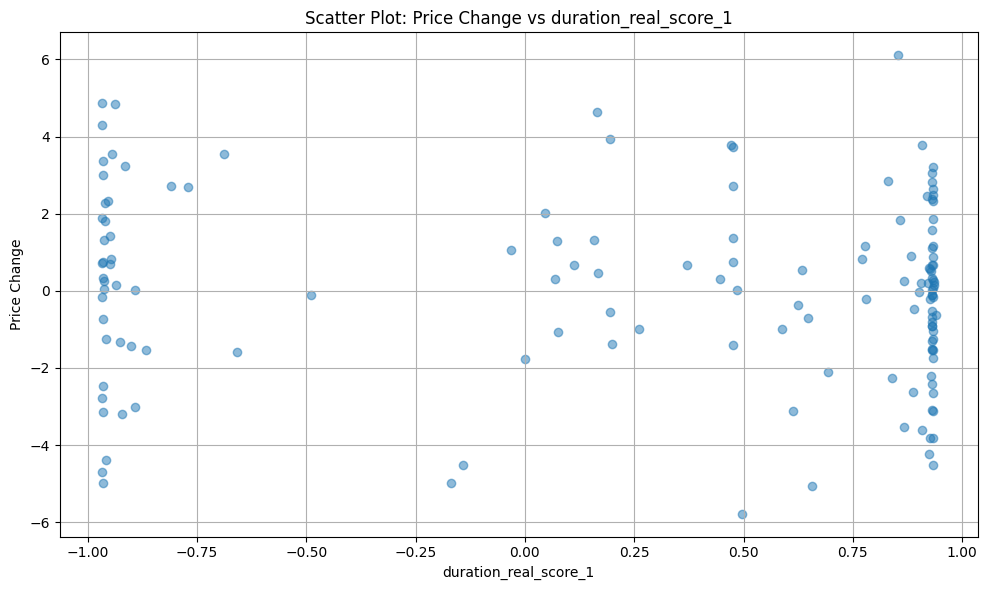



-------------------------------------------------------------------------------
-------------- Распределение и корреляция duration_real_score_2 ---------------
p-value for the normal test: 0.003417624751206066
Массив duration_real_score_2 не имеет нормального распределения.


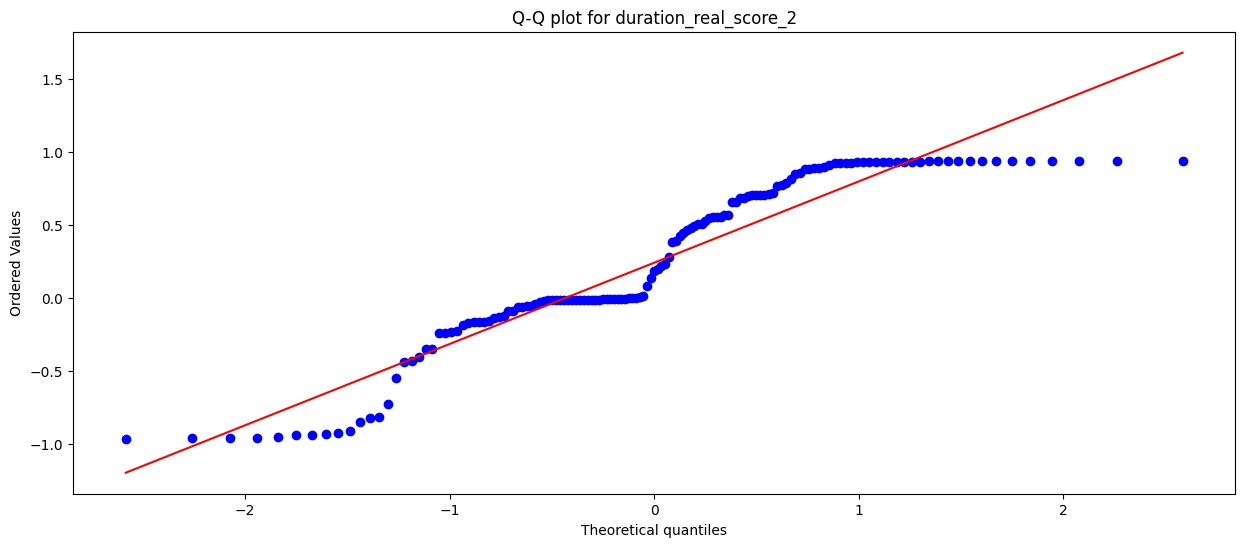

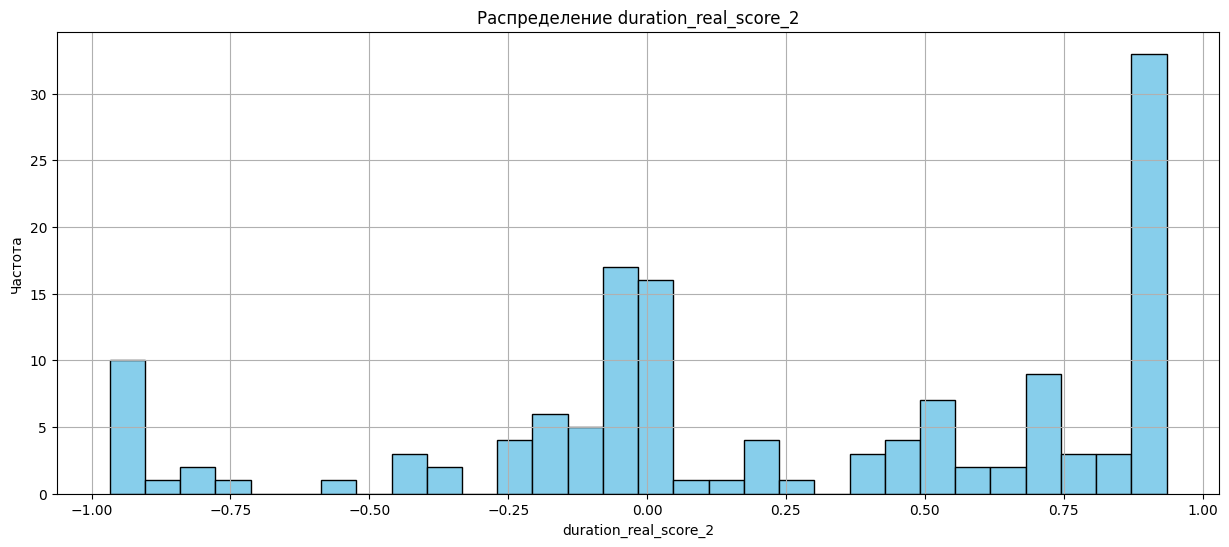

Коэффициент корреляции Пирсона между price_change и duration_real_score_2: -0.11280416446965628

Коэффициент Спирмена между price_change и duration_real_score_2: -0.10755804621717618
p-value: 0.20426339743133326

Коэффициент между price_change и duration_real_score_2: -0.07239913150670686
p-value: 0.20311842510530975


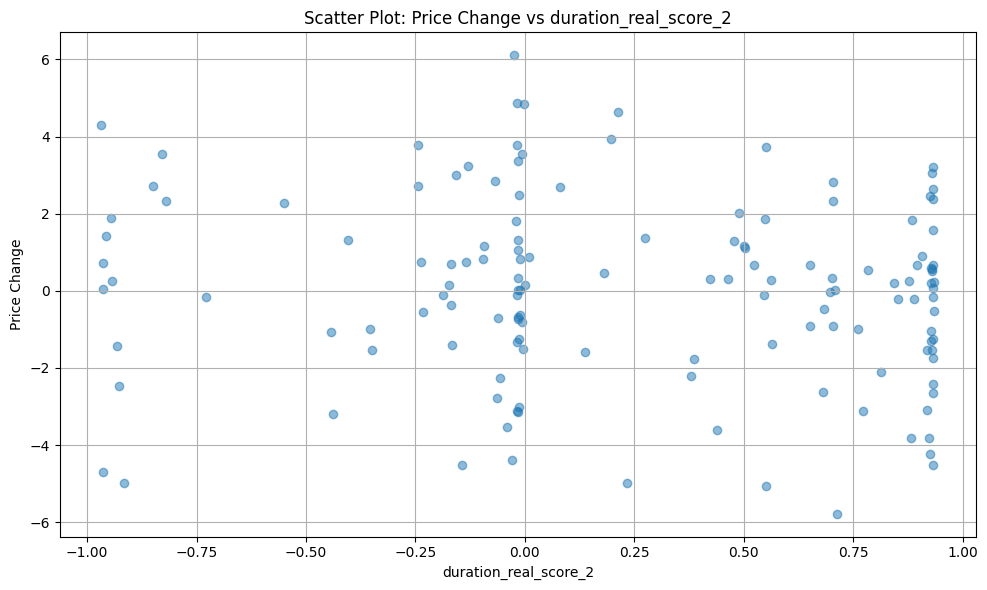



-------------------------------------------------------------------------------
-------------- Распределение и корреляция duration_real_score_3 ---------------
p-value for the normal test: 0.06433489087466127
Массив duration_real_score_3 имеет нормальное распределение.


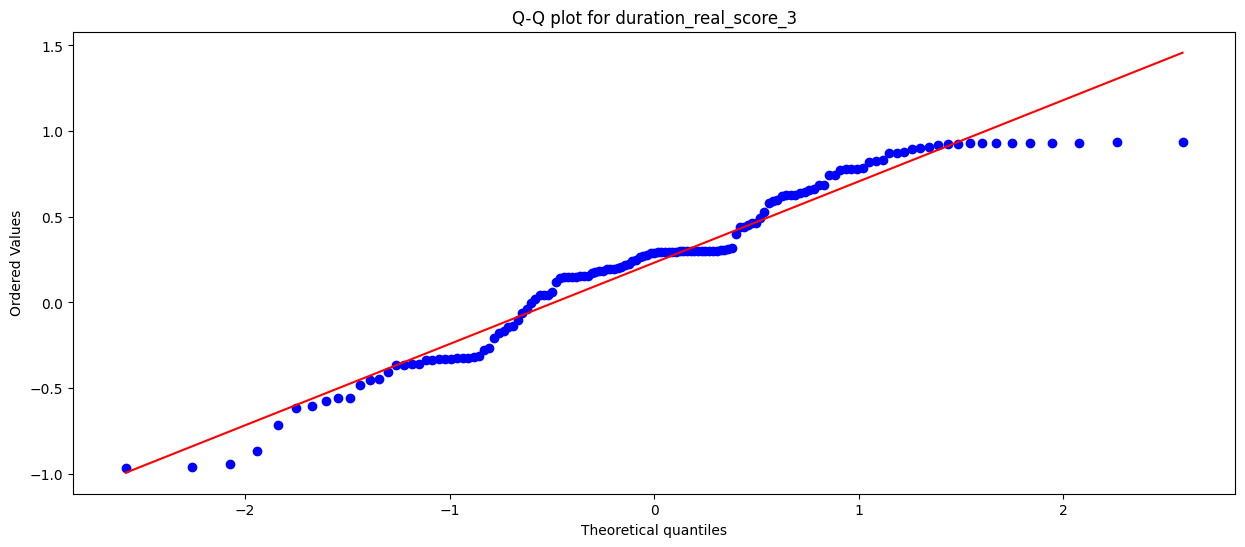

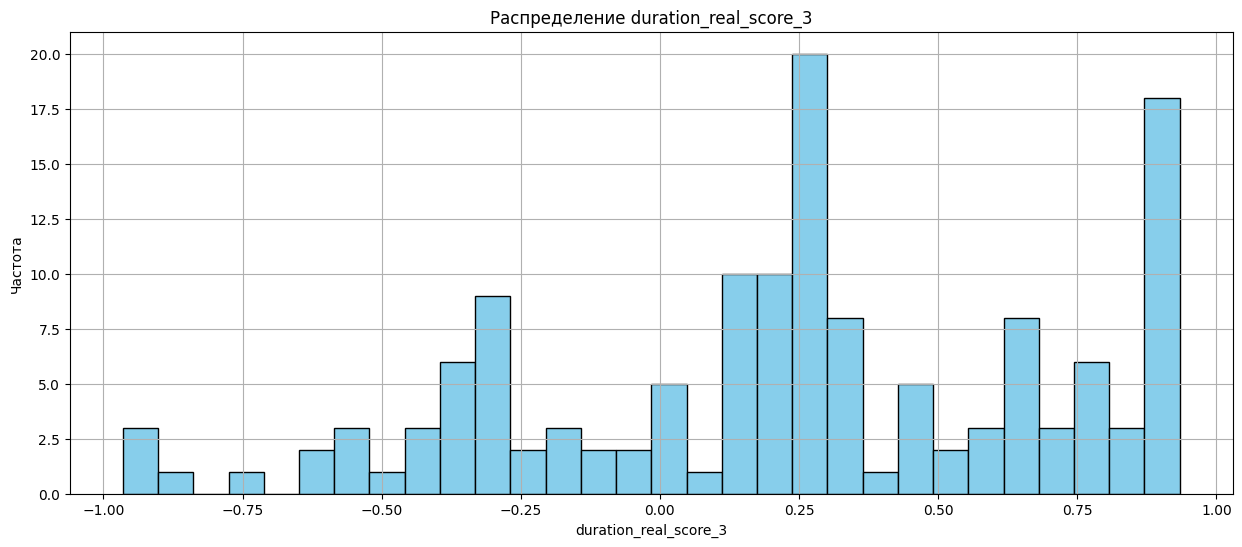

Коэффициент корреляции Пирсона между price_change и duration_real_score_3: -0.17884465917368794

Коэффициент Спирмена между price_change и duration_real_score_3: -0.17609825955649283
p-value: 0.03672667078155684

Коэффициент между price_change и duration_real_score_3: -0.12512679030710963
p-value: 0.027833439449788132


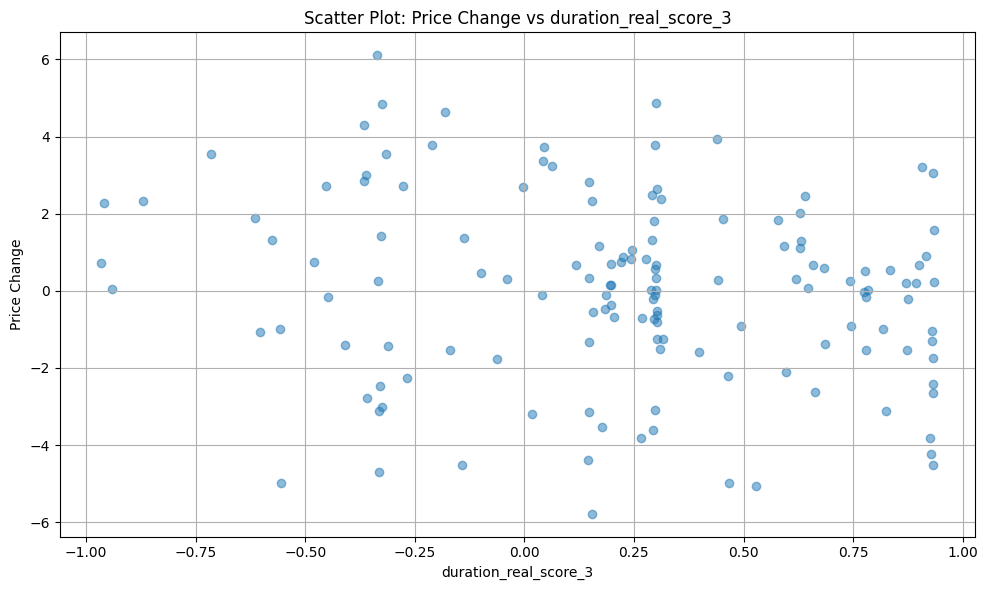



-------------------------------------------------------------------------------
-------------- Распределение и корреляция duration_real_score_4 ---------------
p-value for the normal test: 0.10053964976362902
Массив duration_real_score_4 имеет нормальное распределение.


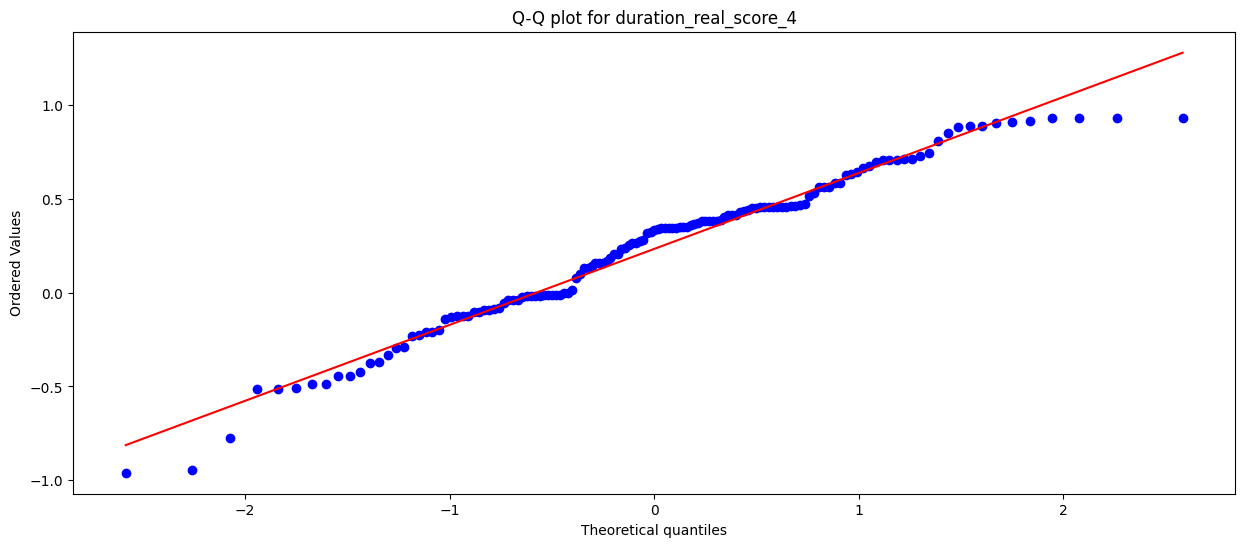

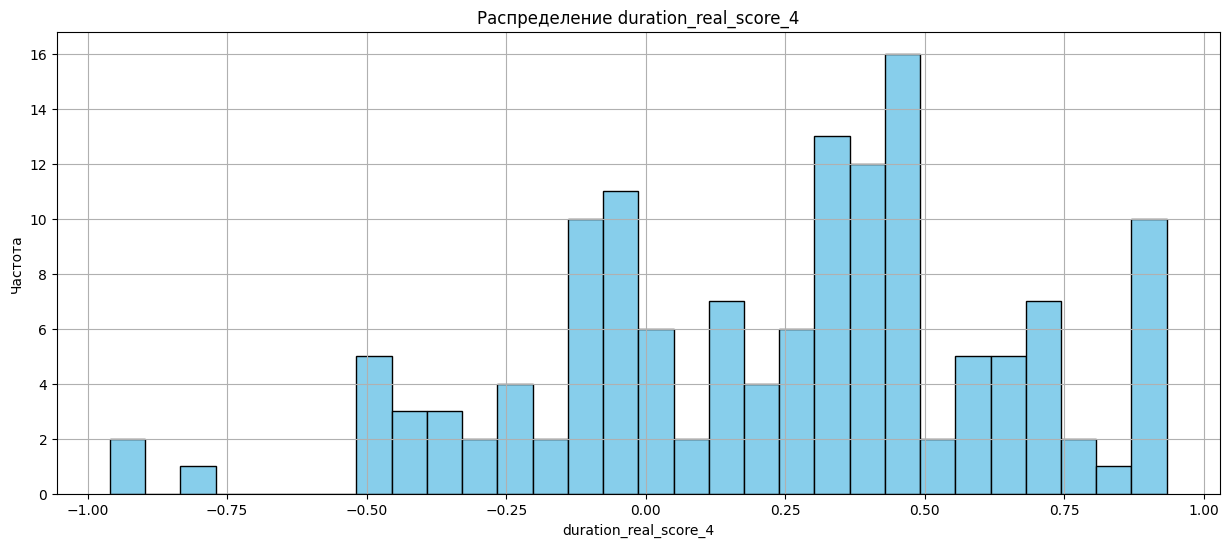

Коэффициент корреляции Пирсона между price_change и duration_real_score_4: -0.16474753511790774

Коэффициент Спирмена между price_change и duration_real_score_4: -0.1525802678289802
p-value: 0.07087871710447387

Коэффициент между price_change и duration_real_score_4: -0.10454801989261442
p-value: 0.06609512797125794


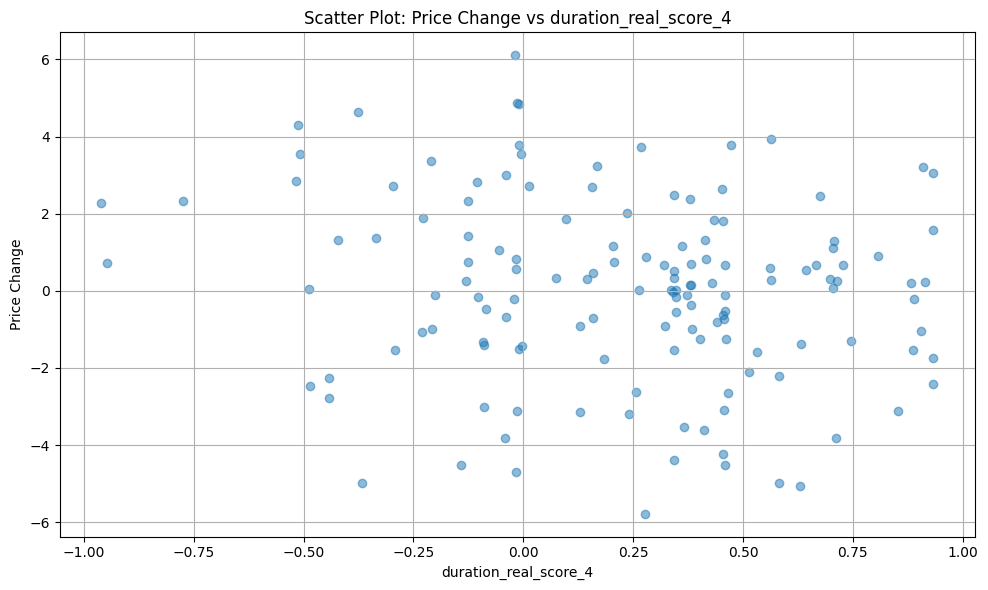



-------------------------------------------------------------------------------
-------------- Распределение и корреляция duration_real_score_5 ---------------
p-value for the normal test: 0.08045322871223436
Массив duration_real_score_5 имеет нормальное распределение.


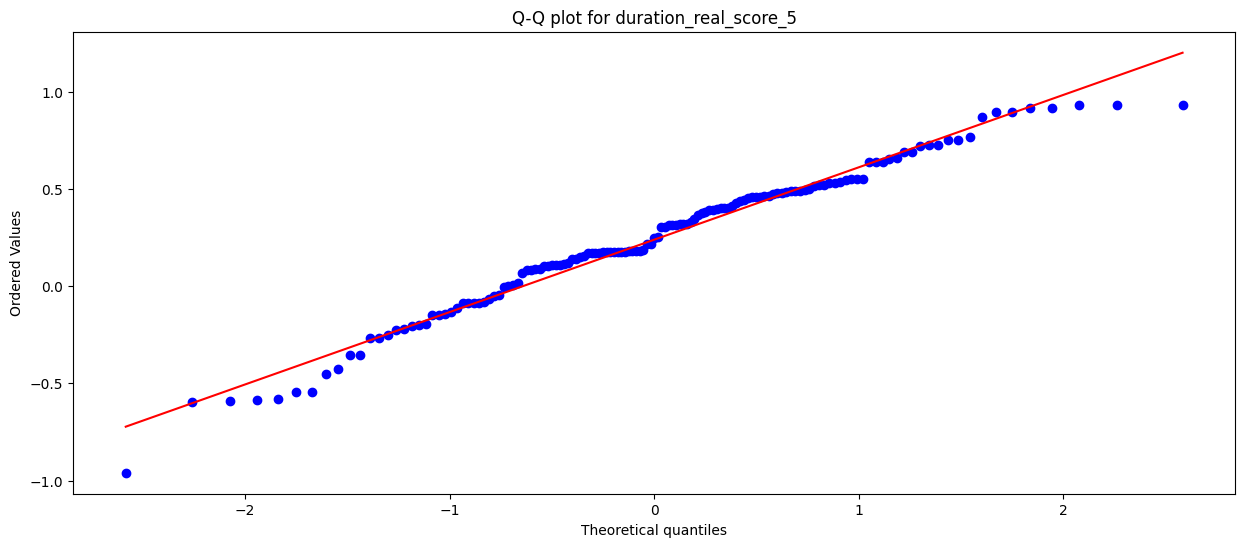

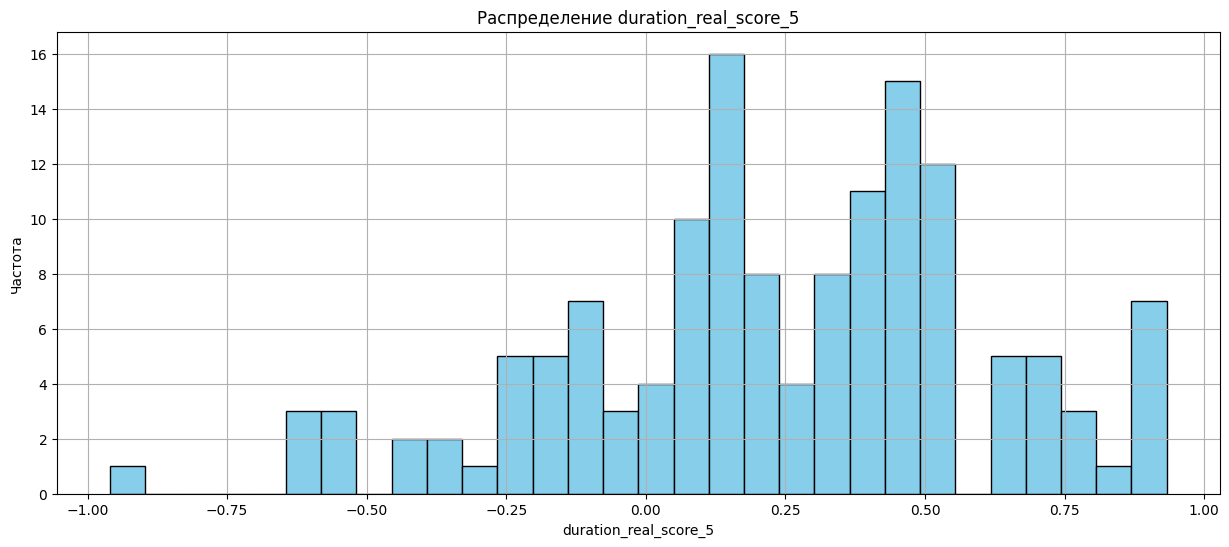

Коэффициент корреляции Пирсона между price_change и duration_real_score_5: -0.06917406762718041

Коэффициент Спирмена между price_change и duration_real_score_5: -0.05278812080664086
p-value: 0.5341535370697954

Коэффициент между price_change и duration_real_score_5: -0.03458243234003722
p-value: 0.5432928001723982


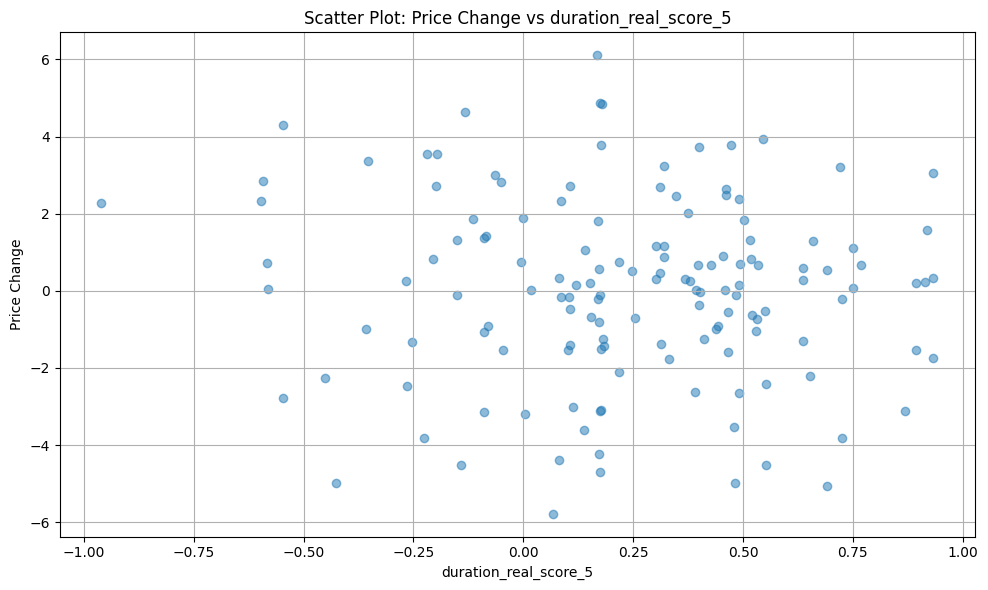



-------------------------------------------------------------------------------
-------------- Распределение и корреляция duration_real_score_6 ---------------
p-value for the normal test: 0.05674366751261896
Массив duration_real_score_6 имеет нормальное распределение.


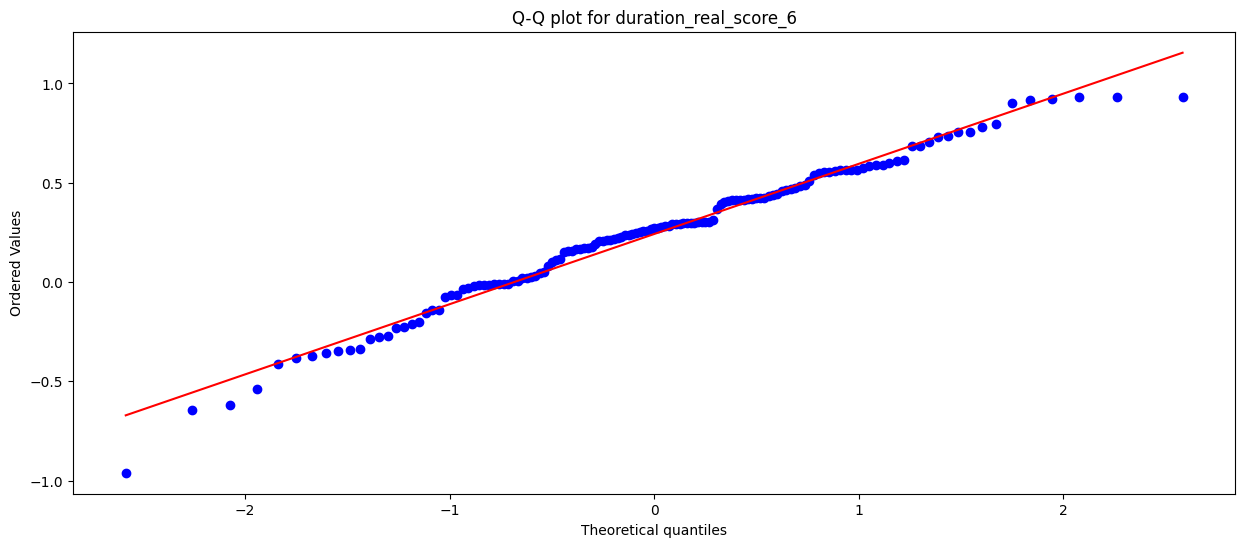

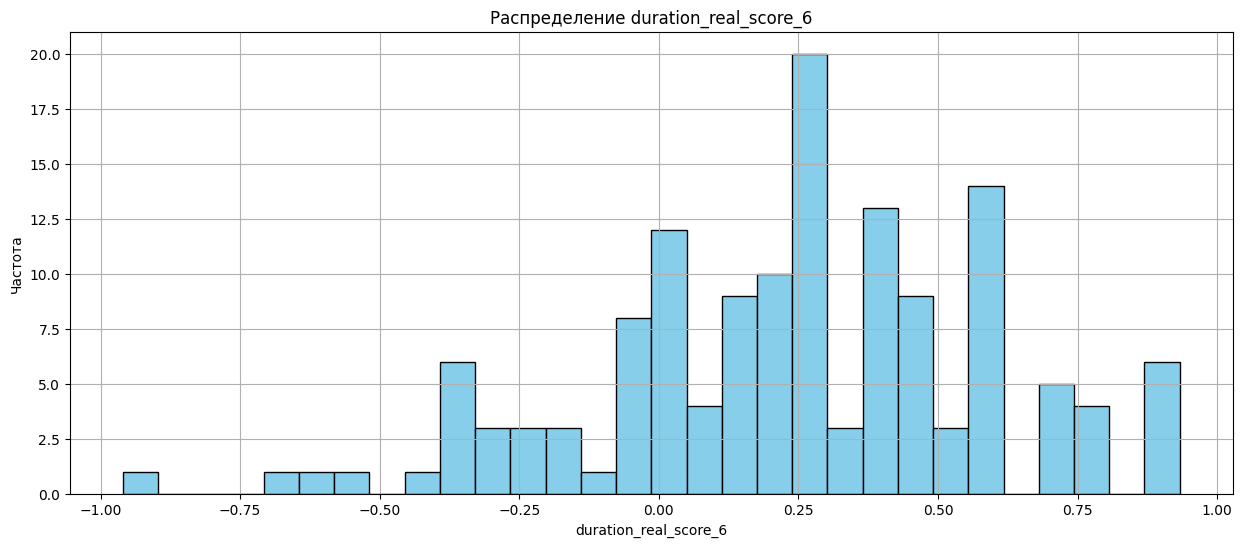

Коэффициент корреляции Пирсона между price_change и duration_real_score_6: -0.08569104959049176

Коэффициент Спирмена между price_change и duration_real_score_6: -0.09203054129639535
p-value: 0.2777535436090493

Коэффициент между price_change и duration_real_score_6: -0.06185359974662632
p-value: 0.2768886131141206


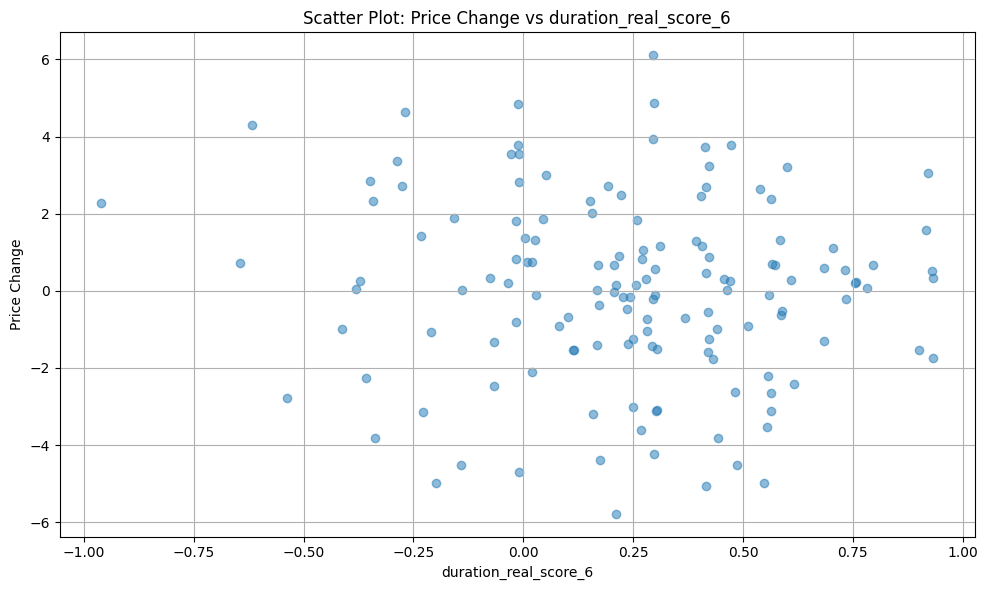



-------------------------------------------------------------------------------
-------------- Распределение и корреляция duration_real_score_7 ---------------
p-value for the normal test: 0.045875622301108365
Массив duration_real_score_7 не имеет нормального распределения.


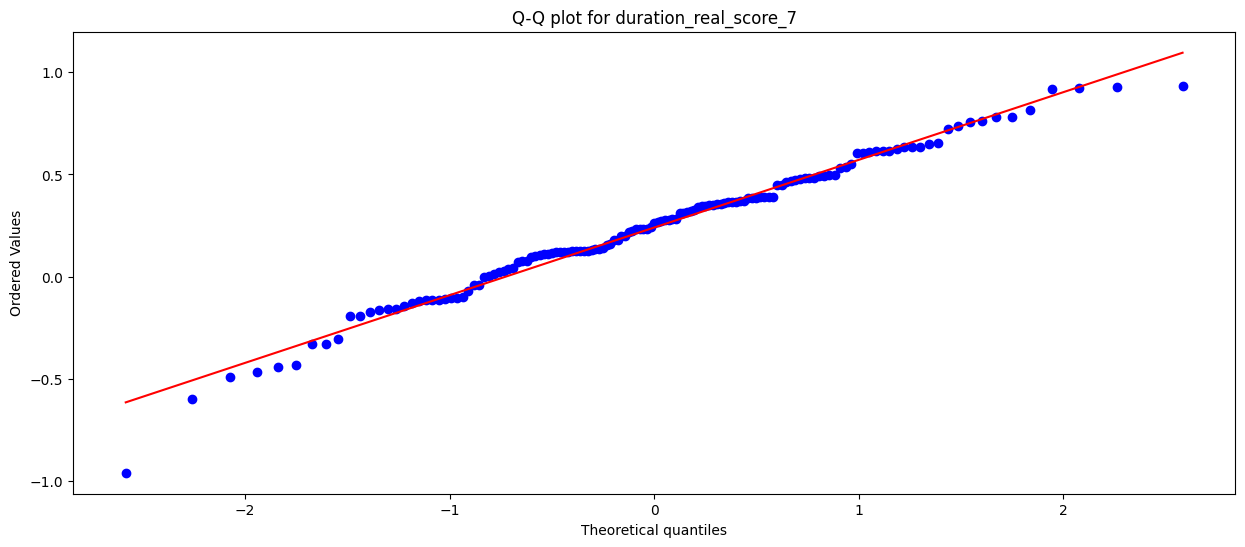

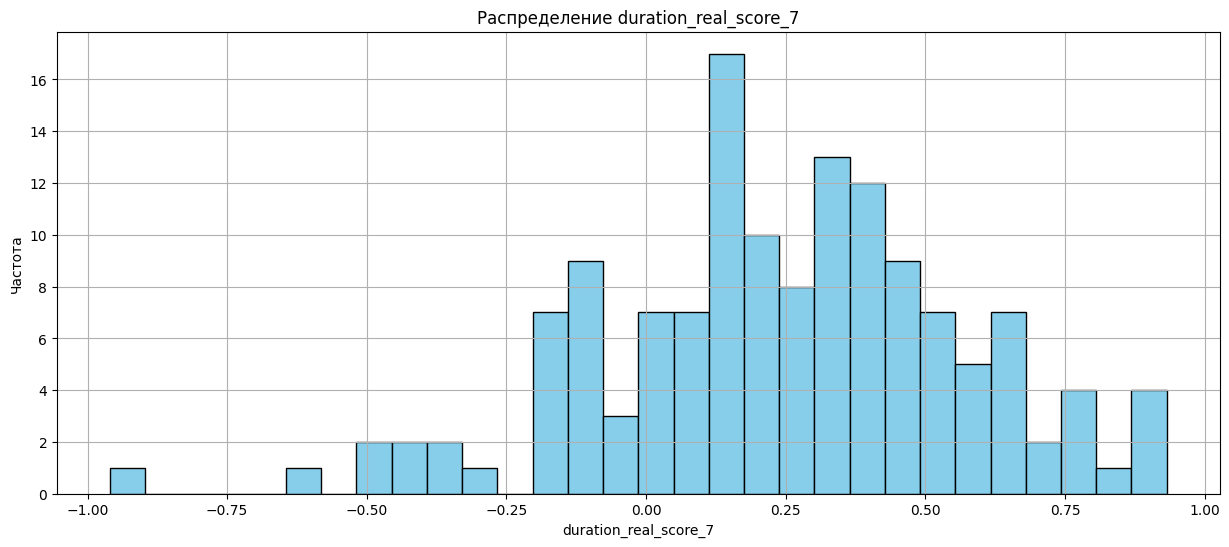

Коэффициент корреляции Пирсона между price_change и duration_real_score_7: -0.10567064474546695

Коэффициент Спирмена между price_change и duration_real_score_7: -0.1023757896121017
p-value: 0.2270469845795764

Коэффициент между price_change и duration_real_score_7: -0.06165080105893246
p-value: 0.278466631432581


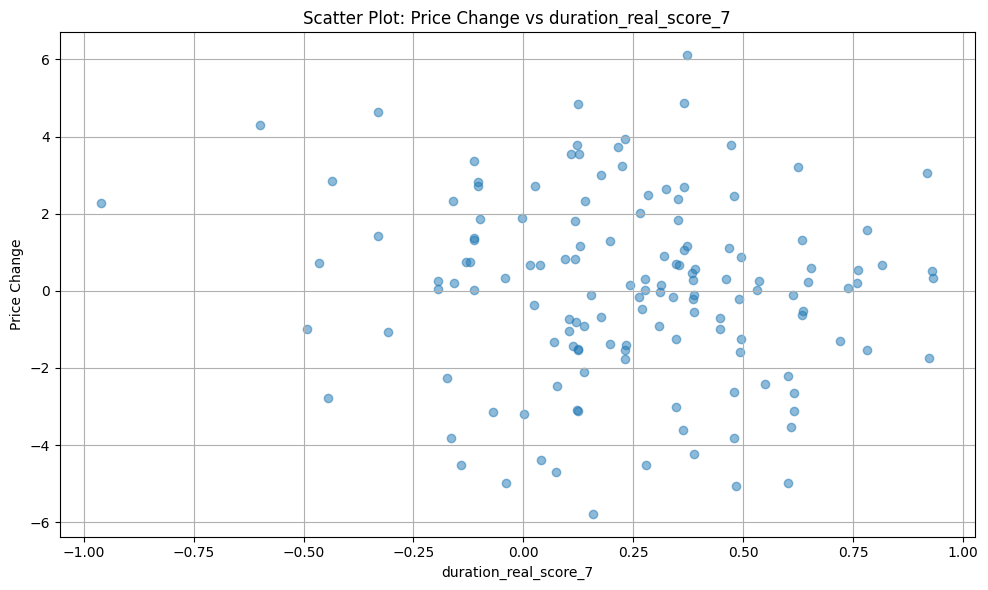

In [46]:
for n in range(0,7):
    print("-------------------------------------------------------------------------------")
    print(f'-------------- Распределение и корреляция duration_real_score_{n+1} ---------------')
    check_distribution(df[f'duration_real_score_{n+1}'],column_name=f'duration_real_score_{n+1}')
    corr_analysis(df['price_change'],df[f'duration_real_score_{n+1}'], col1_name='price_change', col2_name=f'duration_real_score_{n+1}')
    
    plt.figure(figsize=(10, 6))
    plt.scatter(df[f'duration_real_score_{n+1}'], df['price_change'], alpha=0.5)
    plt.title(f'Scatter Plot: Price Change vs duration_real_score_{n+1}')
    plt.xlabel(f'duration_real_score_{n+1}')
    plt.ylabel('Price Change')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print()
    print()